--- Running Experimental Analysis ---

Size: 100     | Median: 5323321  | Time: 0.000494 sec
Size: 1000    | Median: 4985362  | Time: 0.000769 sec
Size: 10000   | Median: 5017319  | Time: 0.009149 sec
Size: 100000  | Median: 5005029  | Time: 0.080520 sec
Size: 500000  | Median: 4996592  | Time: 0.899642 sec
Size: 1000000 | Median: 5003154  | Time: 2.030109 sec


--- Comprehensive Analysis Summary ---
      n  Theoretical O(n)  Experimental (sec)  New Experimental  log10(n)  log10(Experimental)  log10(New Experimental)
    100          0.000203            0.000494        243.532784  2.000000            -3.305923                 2.386557
   1000          0.002030            0.000769        379.007310  3.000000            -3.113833                 2.578648
  10000          0.020301            0.009149       4506.581560  4.000000            -2.038633                 3.653847
 100000          0.203011            0.080520      39663.148977  5.000000            -1.094094                 4.598

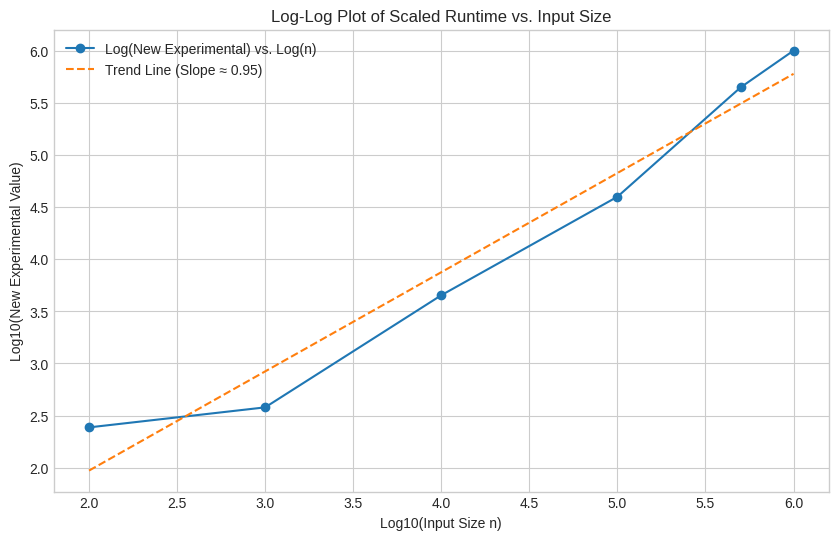

In [10]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def median_of_medians_select(arr, k):
    """
    Finds the k-th smallest element in an array in guaranteed O(n) time.
    """
    if len(arr) <= 5:
        return sorted(arr)[k]

    groups = [arr[i:i+5] for i in range(0, len(arr), 5)]
    medians = [sorted(group)[len(group)//2] for group in groups]
    pivot = median_of_medians_select(medians, len(medians)//2)
    lows = [x for x in arr if x < pivot]
    highs = [x for x in arr if x > pivot]
    pivots = [x for x in arr if x == pivot]

    if k < len(lows):
        return median_of_medians_select(lows, k)
    elif k < len(lows) + len(pivots):
        return pivot
    else:
        return median_of_medians_select(highs, k - len(lows) - len(pivots))

# --- Main Program Execution ---
if __name__ == "__main__":

    # --- 1. SETUP AND RUN EXPERIMENT ---
    input_sizes = [100, 1000, 10000, 100000, 500000, 1000000]
    runtimes_list = []

    print("--- Running Experimental Analysis ---\n")
    for n in input_sizes:
        test_array = [random.randint(0, 10_000_000) for _ in range(n)]
        median_index = n // 2

        start = time.perf_counter()
        median = median_of_medians_select(test_array, median_index)
        end = time.perf_counter()

        elapsed_sec = end - start
        runtimes_list.append(elapsed_sec)
        print(f"Size: {n:<7} | Median: {median:<8} | Time: {elapsed_sec:.6f} sec")

    # --- 2. PREPARE COMPREHENSIVE DATA TABLE ---
    n_values = np.array(input_sizes)
    runtimes = np.array(runtimes_list)

    scaling_factor = runtimes[-1] / n_values[-1]
    theoretical_values = scaling_factor * n_values

    vis_scaling_factor = 1 / scaling_factor
    new_experimental = runtimes * vis_scaling_factor

    log_n = np.log10(n_values)
    log_runtimes = np.log10(runtimes)
    log_new_experimental = np.log10(new_experimental)

    results_table = pd.DataFrame({
        'n': n_values,
        'Theoretical O(n)': theoretical_values,
        'Experimental (sec)': runtimes,
        'New Experimental': new_experimental,
        'log10(n)': log_n,
        'log10(Experimental)': log_runtimes,
        'log10(New Experimental)': log_new_experimental
    })

    print("\n\n--- Comprehensive Analysis Summary ---")
    pd.set_option('display.float_format', '{:.6f}'.format)
    print(results_table.to_string(index=False))

    # --- 3. GENERATE THE CORRECTED LOG-LOG GRAPH ---
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(10, 6))

    # *** PLOT MODIFICATION IS HERE ***
    # Plot log(New Experimental) vs log(n)
    plt.plot(log_n, log_new_experimental, marker='o', linestyle='-', label='Log(New Experimental) vs. Log(n)')

    # Fit a trend line to the new data
    slope, intercept = np.polyfit(log_n, log_new_experimental, 1)
    plt.plot(log_n, slope * log_n + intercept, linestyle='--', label=f'Trend Line (Slope ≈ {slope:.2f})')

    plt.title('Log-Log Plot of Scaled Runtime vs. Input Size')
    plt.xlabel('Log10(Input Size n)')
    plt.ylabel('Log10(New Experimental Value)') # Updated Y-axis label
    plt.legend()
    plt.grid(True)

    plt.savefig('final_corrected_log_log_analysis.png')
    print("\n\nCorrected log-log graph saved to 'final_corrected_log_log_analysis.png'")

    plt.show()